In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
path ='test.csv'

In [40]:
#!head -n 5 $path

In [41]:
df_test = pd.read_csv('test.csv', index_col = ['Id'])
df_train = pd.read_csv('train.csv', index_col = ['Id'])
df_sample = pd.read_csv('sample_submission.csv')

In [42]:
df_test['train_test'] = 'test'
df_train['train_test'] = 'train'

In [43]:
df = pd.concat([df_train, df_test], axis = 0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [44]:
corr_matrix = df.corr()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420
BsmtFinSF2,-0.072530,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,...,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883,-0.011378


# Замена Nan

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

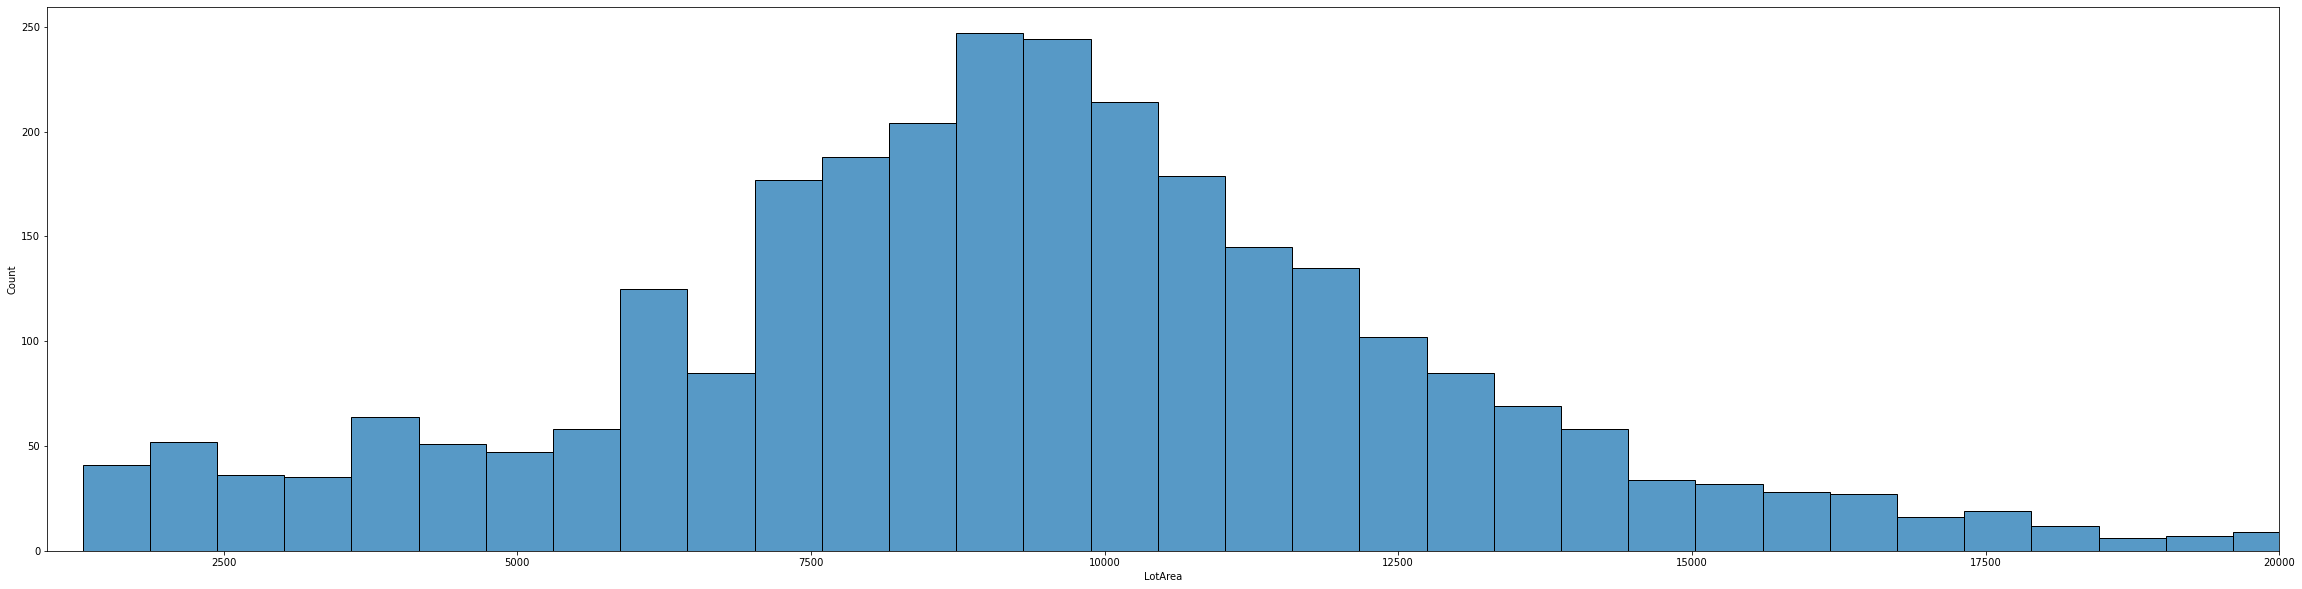

In [45]:
plt.figure(figsize = (40,10))
plt.xlim(1000,20000)
sns.histplot(data = df, x = 'LotArea' )

In [46]:
round(df[df['GarageType']=='Detchd'][['GarageCars']].mean())

GarageCars    2.0
dtype: float64

In [47]:
df['GarageCars'] = df['GarageCars'].fillna(round(df[df['GarageType']=='Detchd']['GarageCars'].mean()))

In [48]:
df['GarageArea'] = df['GarageArea'].fillna(round(df[df['GarageType']=='Detchd']['GarageArea'].mean()))

In [49]:
#df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(round(df['BsmtFinSF2'].mean()))
#df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(round(df['TotalBsmtSF'].mean()))
#df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
#df['GarageYrBlt'] = df['GarageYrBlt'].fillna(lambda row: mean_GarageYrBlt.loc[row['GarageType']])

df['Alley'].fillna('no_alley', inplace=True)
df['MSZoning'] = df['MSZoning'].fillna('RL')
df['Utilities'] = df['Utilities'].fillna('AllPub')
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')
df['MasVnrType'].fillna('no_inform', inplace=True)
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['KitchenQual'] = df['KitchenQual'].fillna('no_inform')
df['Functional'] = df['Functional'].fillna('Typ')
df['SaleType'] = df['SaleType'].fillna('WD')
df['BsmtQual'] = df['BsmtQual'].fillna('no_basement')
df['BsmtCond'] = df['BsmtCond'].fillna('no_basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('no_basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('no_basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('no_basement')
df['FireplaceQu'] = df['FireplaceQu'].fillna('no_fireplace')
df['GarageType'] = df['GarageType'].fillna('no_garage')
df['GarageFinish'] = df['GarageFinish'].fillna('no_garage')
df['GarageQual'] = df['GarageQual'].fillna('no_garage')
df['GarageCond'] = df['GarageCond'].fillna('no_garage')
df['GarageCond'] = df['GarageCond'].fillna('no_garage')
df['PoolQC'] = df['PoolQC'].fillna('no_pool')
df['Fence'] = df['Fence'].fillna('no_fence')
df['MiscFeature'] = df['MiscFeature'].fillna('no_feature')

In [50]:
df.select_dtypes(include=['object']).isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
train_test       0
dtype: int64

In [51]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(round(df['BsmtFinSF1'].mean()))
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(round(df['BsmtFinSF2'].mean()))
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(round(df['BsmtUnfSF'].mean()))
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(round(df['TotalBsmtSF'].mean()))
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df.groupby('GarageType')['GarageYrBlt'].transform('mean'))
df['MasVnrArea'] = df['MasVnrArea'].fillna(round(df['MasVnrArea'].mean()))
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('Alley')['LotFrontage'].transform('mean'))

In [52]:
df[df['LotFrontage'].isnull()][['LotFrontage']]
df['GarageYrBlt'].iloc[7:13]
#df['GarageType'].isnull().sum()
df['GarageYrBlt'].isnull().sum()

157

In [53]:
df.select_dtypes(include=['int64', 'float64']).isnull().sum()

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       157
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [54]:
#Для тестирования

df[df['MasVnrArea'].isnull()]['MasVnrType'].value_counts()
#df['BsmtFullBath'].value_counts()
#df['Age_fill'] = df.apply(lambda row: mean_age.loc[(row['Sex'], row['Pclass'])], axis=1)
df[df['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
Id,,,,,,,,,,,,,,,,,,,,,


In [55]:
#Для тестирования

#df[df['Utilities '].isnull()]['BldgType'].value_counts()
#df['KitchenQual'].value_counts()
#df['Age_fill'] = df.apply(lambda row: mean_age.loc[(row['Sex'], row['Pclass'])], axis=1)
#df[df['SaleType'].isnull()]
#df['MiscFeature'].value_counts()
#df.groupby(['KitchenAbvGr','KitchenQual'])['KitchenAbvGr'].count()

#mean_age = df.groupby(['Sex', 'Pclass'])['Age'].median().round()

<AxesSubplot:>

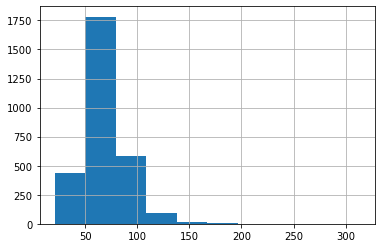

In [56]:
df['LotFrontage'].hist()

<AxesSubplot:>

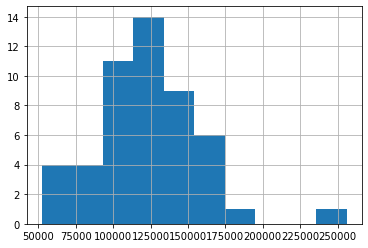

In [57]:
df[df['Alley']=='Grvl']['SalePrice'].hist()

In [58]:
features = [#'Id',  
            'LotFrontage', 
            'LotArea',  
            'YearBuilt', 
            'YearRemodAdd',
            'MasVnrArea', #Masonry veneer area in square feet 
            'BsmtFinSF1', 
            'BsmtFinSF2', 
            'BsmtUnfSF', 
            'TotalBsmtSF', 
            '1stFlrSF', 
            '2ndFlrSF',
            'LowQualFinSF', 
            'GrLivArea', 
            'BsmtFullBath', 
            'BsmtHalfBath', 
            'FullBath',
            'HalfBath', 
            'BedroomAbvGr', 
            'KitchenAbvGr',
            'TotRmsAbvGrd', 
            'Fireplaces',
            #'GarageYrBlt',
            'GarageCars', 
            'GarageArea',
            'WoodDeckSF', 
            'OpenPorchSF',
            'EnclosedPorch', 
            '3SsnPorch', 
            'ScreenPorch', 
            'PoolArea', 
            'MiscVal', 
            'MoSold', 
            'YrSold', 
            
]

cat_features = ['MSZoning',
            'Street',
            'Alley', 
            'LotShape', 
            'LandContour', 
            'Utilities', 
            'LotConfig',
            'LandSlope', 
            'Neighborhood', 
            'Condition1', 
            'Condition2',
            'GarageQual',
            'BldgType',
            'HouseStyle', 
            'RoofStyle', 
            'RoofMatl', 
            'Exterior1st', 
            'Exterior2nd', 
            'MasVnrType',
            'ExterQual', 
            'ExterCond', 
            'Foundation', 
            'BsmtQual',
            'BsmtCond', 
            'BsmtExposure', 
            'BsmtFinType1',
            'BsmtFinType2',
            'Heating',
            'HeatingQC', 
            'CentralAir', 
            'Electrical', 
            'KitchenQual',
            'Functional',
            'FireplaceQu', 
            'GarageType',
            'GarageFinish', 
            'GarageCond', 
            'PavedDrive', 
            'PoolQC',
            'Fence', 
            'MiscFeature', 
            'SaleType',
            'SaleCondition',
            'OverallQual', 
            'OverallCond',
            'MSSubClass'
               ]
            

    
            
tr_te = 'train_test'          
target = 'SalePrice'

In [59]:
df[df[tr_te] =='train']['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

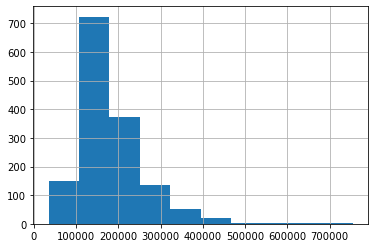

In [60]:
df[df[tr_te] =='train']['SalePrice'].hist()

In [61]:
df.groupby(['LandSlope']).std().round()[target]/df.groupby(['LandSlope']).mean().round()[target]
df[target].std()

79442.50288288663

LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


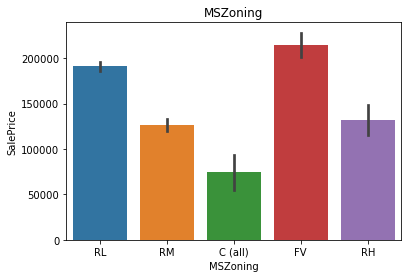


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


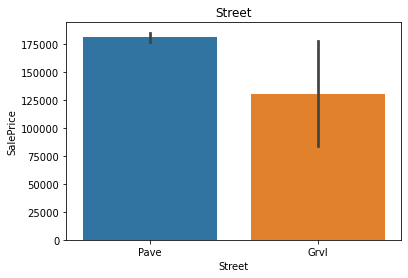


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


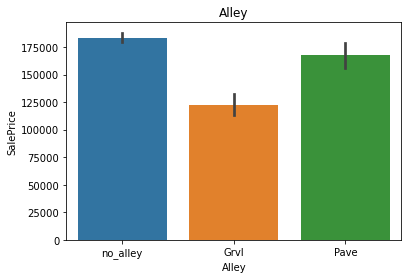


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


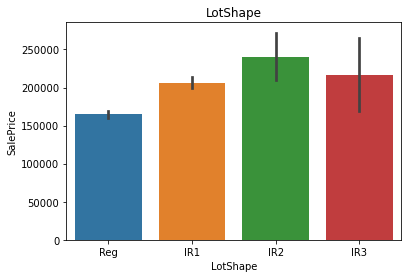


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


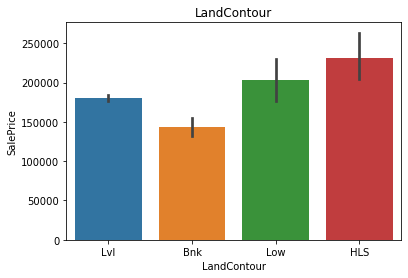


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


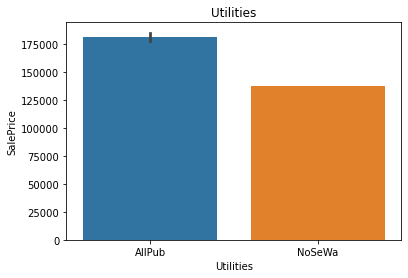


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


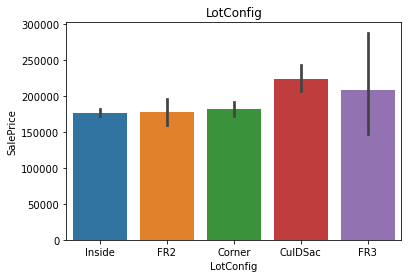


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


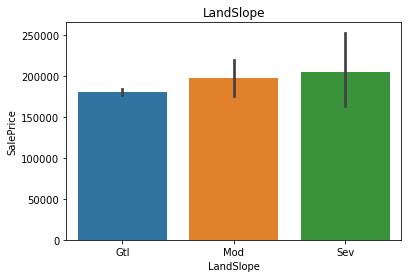


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


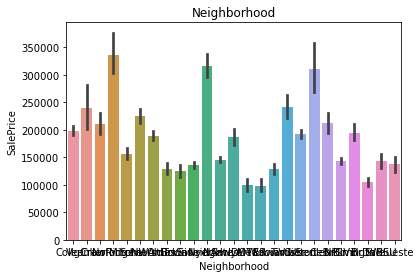


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


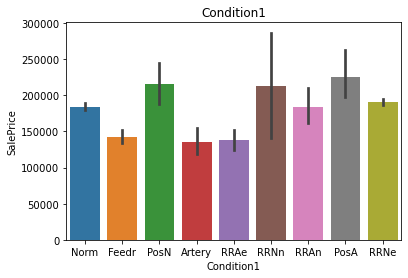


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


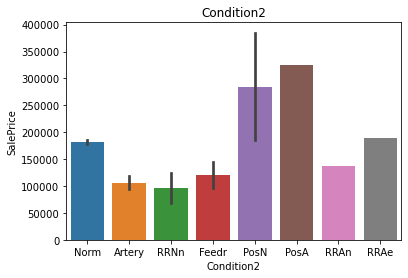


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


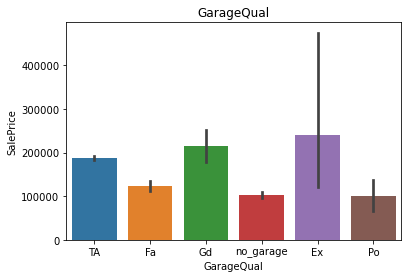


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


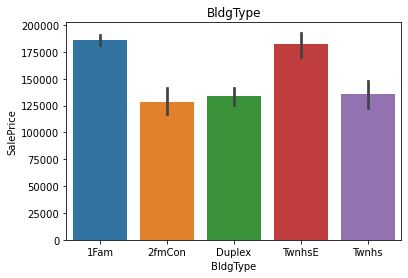


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


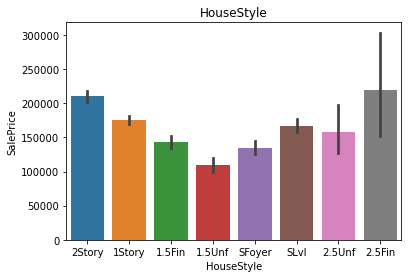


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


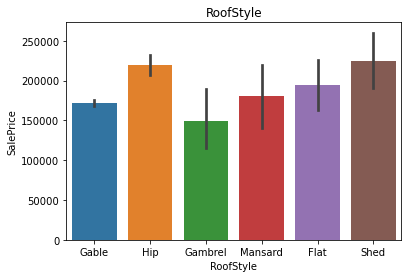


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


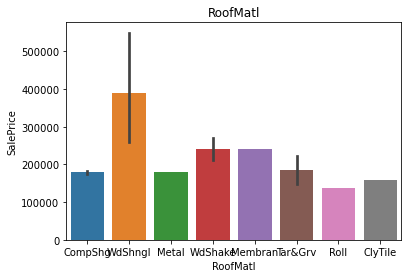


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


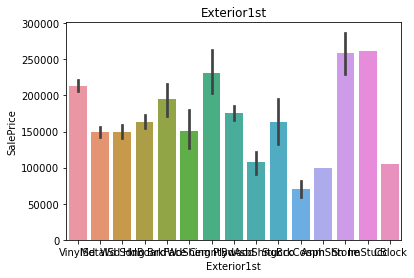


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


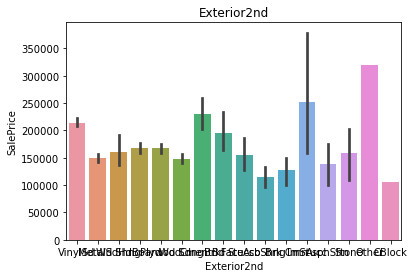


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


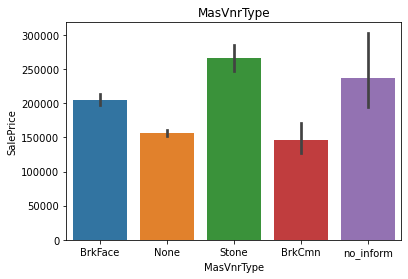


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


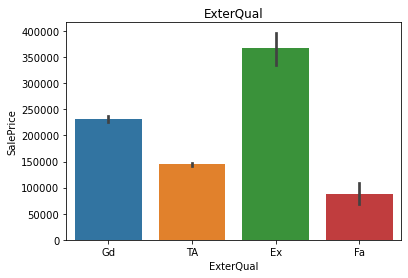


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


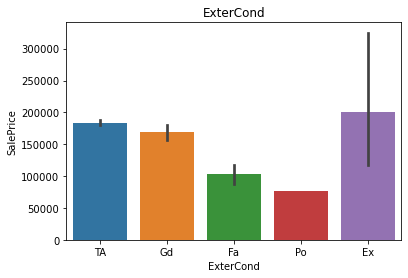


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


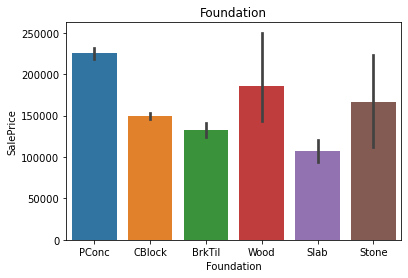


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


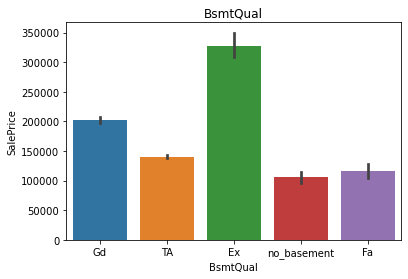


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


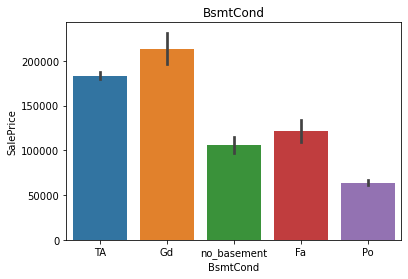


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


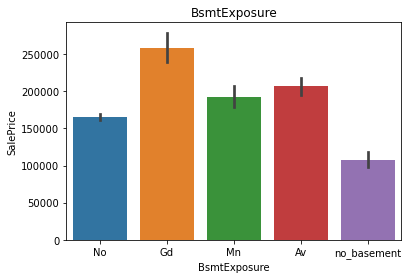


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


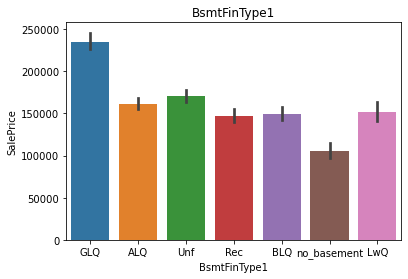


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


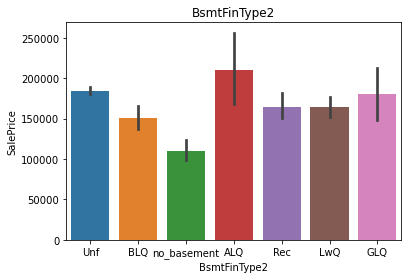


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


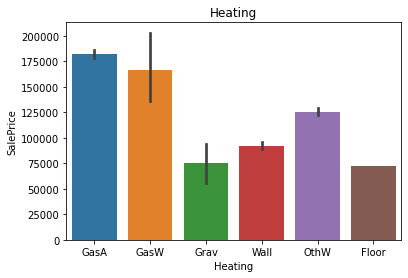


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


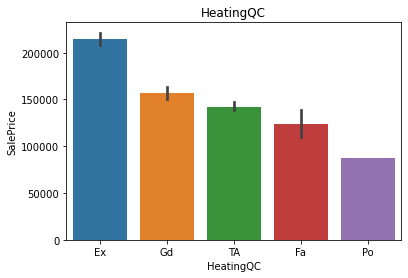


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


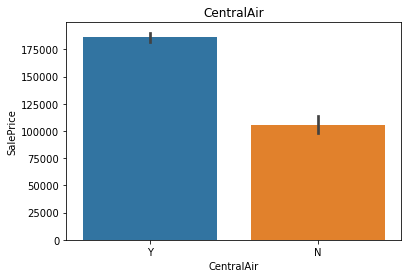


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


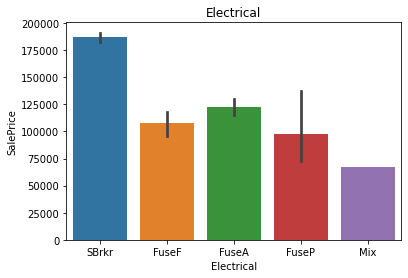


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


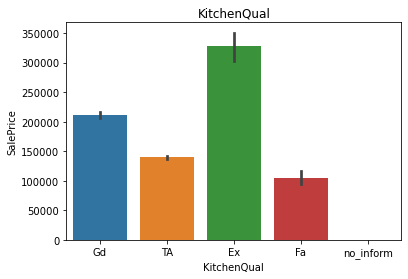


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


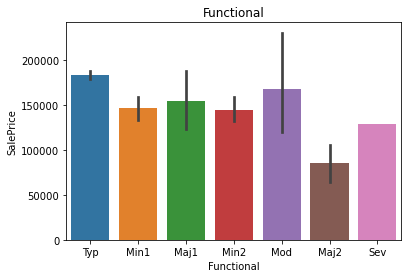


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


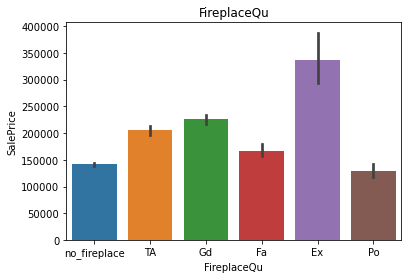


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


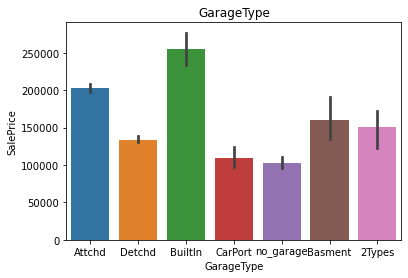


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


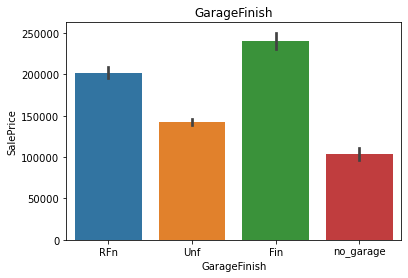


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


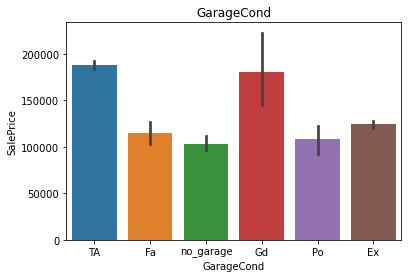


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


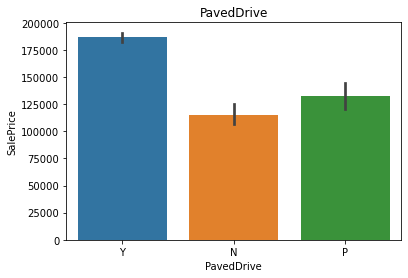


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


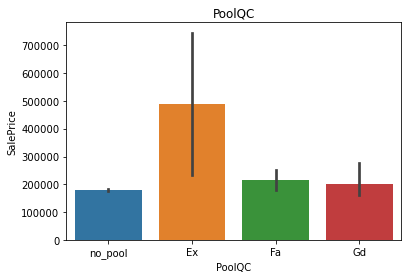


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


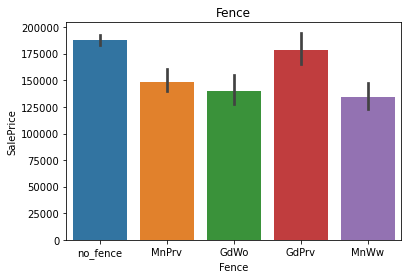


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


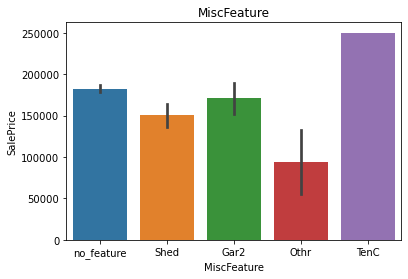


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


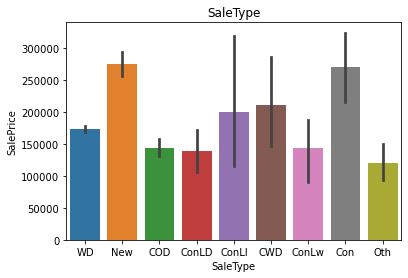


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


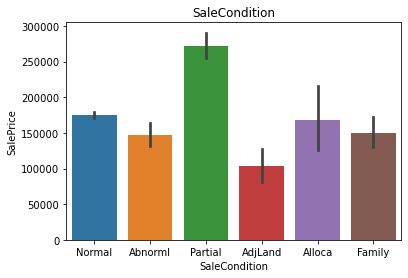


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


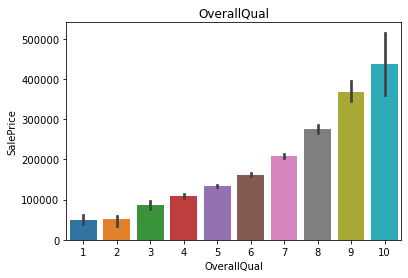


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


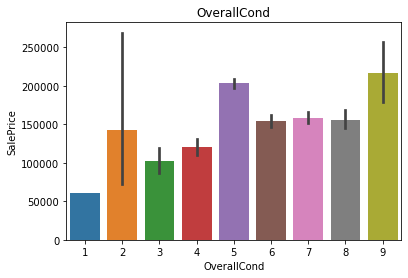


LandSlope
Gtl    0.44
Mod    0.47
Sev    0.42
Name: SalePrice, dtype: float64


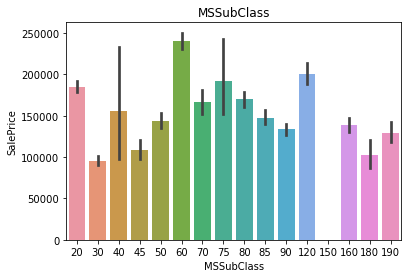

In [62]:
for feature in cat_features:
    plt.title(feature)
    print(((df.groupby(['LandSlope']).std()[target]/df.groupby(['LandSlope']).mean()[target])).round(2))
    sns.barplot(y=df[target], x=df[feature], data= df)
    plt.show()
    print()
print();


#ax = sns.barplot(x = 'day', y = 'tip', data = tips, ci=100)

# One-hot-encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoder.fit(df[cat_features])
cat_enc_cols = [f'{c}_{el}' for arr, c in zip(onehot_encoder.categories_, cat_features) for el in arr]

one_frame =  pd.DataFrame(onehot_encoder.transform(df[cat_features]),
                          columns=cat_enc_cols, index = df.index)
one_frame.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_no_alley,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
features = features+cat_enc_cols

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,no_alley,Reg,Lvl,AllPub,Inside,...,no_pool,no_fence,no_feature,0,2,2008,WD,Normal,208500.0,train
2,20,RL,80.0,9600,Pave,no_alley,Reg,Lvl,AllPub,FR2,...,no_pool,no_fence,no_feature,0,5,2007,WD,Normal,181500.0,train
3,60,RL,68.0,11250,Pave,no_alley,IR1,Lvl,AllPub,Inside,...,no_pool,no_fence,no_feature,0,9,2008,WD,Normal,223500.0,train
4,70,RL,60.0,9550,Pave,no_alley,IR1,Lvl,AllPub,Corner,...,no_pool,no_fence,no_feature,0,2,2006,WD,Abnorml,140000.0,train
5,60,RL,84.0,14260,Pave,no_alley,IR1,Lvl,AllPub,FR2,...,no_pool,no_fence,no_feature,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,no_alley,Reg,Lvl,AllPub,Inside,...,no_pool,no_fence,no_feature,0,6,2006,WD,Normal,NaN,test
2916,160,RM,21.0,1894,Pave,no_alley,Reg,Lvl,AllPub,Inside,...,no_pool,no_fence,no_feature,0,4,2006,WD,Abnorml,NaN,test
2917,20,RL,160.0,20000,Pave,no_alley,Reg,Lvl,AllPub,Inside,...,no_pool,no_fence,no_feature,0,9,2006,WD,Abnorml,NaN,test


In [65]:
df_all = pd.merge(df, one_frame, on = 'Id')

In [66]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [67]:
df_train = df_all[df_all['train_test']=='train']
df_test = df_all[df_all['train_test']=='test']

In [68]:
target = df_train['SalePrice']
x, y = df_train[features].to_numpy(), target.to_numpy()
target

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)
x_train.shape,  x_test.shape, y_train.shape, y_test.shape

((1022, 335), (438, 335), (1022,), (438,))

In [70]:
#Normalizaton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [71]:
# Grid search + cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer, mean_squared_log_error

# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
GBR = GradientBoostingRegressor()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'loss': ['ls', 'lad','huber'],
    'learning_rate': [0.2, 0.3, 0.5],
    'n_estimators': [8, 10,12,20],
    'max_depth': [6,5, 8],
    'max_leaf_nodes': [35,40,45, None],
    'max_features':['log2', 'sqrt'],
    'tol':[0.01,0.1, 1, 0.0001]
}


# создаем объект
cv = GridSearchCV(
    estimator=GBR,
    param_grid=param_grid,
    scoring = make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False), # метрика, которую будем *максимизировать*
    return_train_score= True,
    #refit= make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False),
    cv=12, # количество фолдов
    verbose=4, # сколько печатать сообщений
    n_jobs=-1, # насколько параллелельно считаем
)

In [72]:
cv.fit(x_train_norm, y_train)

Fitting 12 folds for each of 3456 candidates, totalling 41472 fits


KeyboardInterrupt: 

In [ ]:
cv.best_params_, cv.best_score_

In [ ]:
cv.best_estimator_, cv.best_estimator_.predict

In [ ]:
cv.best_estimator_.fit(x_train_norm,y_train)

In [ ]:
print(f'''
    Score:
    train {mean_squared_log_error(y_train, cv.best_estimator_.predict(x_train))**.5 :.2f}
    test {mean_squared_log_error(y_test, cv.best_estimator_.predict(x_test))**.5 :.2f}  
''')


# Kaggle

In [ ]:
x_test_kag = df_test[features].to_numpy()
x_test_test_norm = scaler.transform(x_test_kag)

In [ ]:
cv.best_estimator_.predict(x_test_test_norm)

In [ ]:
df_sample['SalePrice'] = cv.best_estimator_.predict(x_test_test_norm)

In [ ]:
#df_sample.to_csv('house_prices_kag1.csv',columns = ['Id','SalePrice'],index=False)

# knn

In [73]:
# Grid search + cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
KNR = KNeighborsRegressor( )

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'n_neighbors': [3,5,7,11],
    'p': [1,2,3],
    'weights': ['uniform', 'distance'],
    'leaf_size':[9, 10, 12] 
}

# создаем объект
cv_knn = GridSearchCV(
    estimator = KNR, 
    param_grid = param_grid,
    scoring = make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False), # метрика, которую будем *максимизировать*
    return_train_score= True,
    cv=5, #кол-во фолдов
    verbose = 4,
    n_jobs = -1 # насколько параллелельно считаем,
    #refit=True
    )

In [74]:
cv_knn.fit(x_train_norm, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [9, 10, 12], 'n_neighbors': [3, 5, 7, 11],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             return_train_score=True,
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [75]:
cv_knn.best_params_, cv_knn.best_score_

({'leaf_size': 9, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 -0.1789187919722896)

In [76]:
cv_knn.best_estimator_, cv_knn.best_estimator_.predict

(KNeighborsRegressor(leaf_size=9, p=1, weights='distance'),
 <bound method KNeighborsRegressor.predict of KNeighborsRegressor(leaf_size=9, p=1, weights='distance')>)

In [77]:
cv_knn.best_estimator_.fit(x_train_norm,y_train)

KNeighborsRegressor(leaf_size=9, p=1, weights='distance')

In [78]:
print(f'''
    Score:
    train {mean_squared_log_error(y_train, cv_knn.best_estimator_.predict(x_train))**.5 :.2f}
    test {mean_squared_log_error(y_test, cv_knn.best_estimator_.predict(x_test))**.5 :.2f}  
''')


    Score:
    train 0.40
    test 0.45  



In [80]:
x_test_kag = df_test[features].to_numpy()
x_test_test_norm = scaler.transform(x_test_kag)

cv_knn.best_estimator_.predict(x_test_test_norm)
df_sample['SalePrice'] = cv_knn.best_estimator_.predict(x_test_test_norm)

df_sample.to_csv('house_prices_kag_knn.csv',columns = ['Id','SalePrice'],index=False)

In [81]:
cv_knn.best_estimator_.predict(x_test_test_norm)

array([136027.24247262, 145579.38927145, 182511.01305787, ...,
       123535.78879736, 106903.25108224, 214501.51364151])

# ElasticNet

In [1086]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet( )

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100],
    'l1_ratio': [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
}

# создаем объект
cv_EN = GridSearchCV(
    estimator = EN, 
    param_grid = param_grid,
    scoring = make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False), # метрика, которую будем *максимизировать*
    return_train_score= True,
    cv=12, #кол-во фолдов
    verbose = 4,
    n_jobs = -1 # насколько параллелельно считаем,
    #refit=True
    )


In [1087]:
cv_EN.fit(x_train_norm, y_train)

Fitting 12 folds for each of 121 candidates, totalling 1452 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.15353359 -0.15360236 -0.15368901
 -0.15441086 -0.1553931  -0.17161617         nan         nan         nan
         nan         nan -0.14395209 -0.14399702 -0.14405358 -0.14452277
 -0.14515479 -0.15350749         nan         nan         nan         nan
         nan -0.13385391 -0.13385748 -0.13386213 -0.13390787 -0.13398799
 -0.13619791         nan         nan         nan         nan         nan
 -0.13550768 -0.13548278 -0.13545181 -0.13521057 -0.13

GridSearchCV(cv=12, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   50, 100],
                         'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                      10, 50, 100]},
             return_train_score=True,
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [1050]:
cv_EN.best_params_, cv_EN.best_score_

({'alpha': 1, 'l1_ratio': 0.5}, -0.13384712633923002)

In [1051]:
cv_EN.best_estimator_, cv_EN.best_estimator_.predict

(ElasticNet(alpha=1),
 <bound method LinearModel.predict of ElasticNet(alpha=1)>)

In [1052]:
cv_EN.best_estimator_.fit(x_train_norm,y_train)

ElasticNet(alpha=1)

In [1053]:
print(f'''
    Score:
    train {mean_squared_log_error(y_train, cv_EN.best_estimator_.predict(x_train))**.5 :.2f}
    test {mean_squared_log_error(y_test, cv_EN.best_estimator_.predict(x_test))**.5 :.2f}  
''')


    Score:
    train 5.94
    test 5.95  



In [1104]:
np.e**cv_EN.best_estimator_.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.


array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in